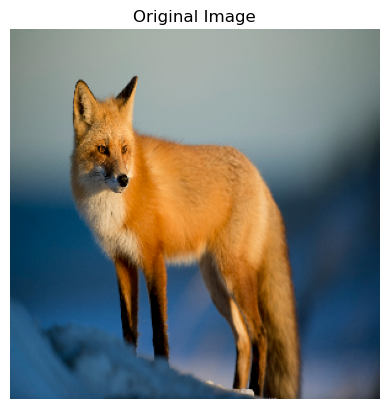

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Load and convert to RGB
img = cv2.imread('Animal.jpg')
img = cv2.resize(img, (300, 300))  # ensure square
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [3]:
#Slicing Image into N*N Blocks
def slice_image(image, N=3):
    h, w = image.shape[:2]
    tile_h, tile_w = h//N , w//N
    tiles = []
    for i in range(N):
        for j in range(N):
            y0, y1 = i * tile_h, (i + 1) * tile_h
            x0, x1 = j * tile_w, (j + 1) * tile_w
            tile = image[y0:y1, x0:x1]
            tiles.append(tile)
    return tiles

In [4]:
N = 3
tiles = slice_image(img_rgb, N)
print(f"Total tiles: {len(tiles)}")

Total tiles: 9


In [5]:
shuffled_tiles = tiles.copy()
random.shuffle(shuffled_tiles)

In [6]:
#Reconstructing shuffles Tiles
def reconstruct_image(tiles, N=3):
    rows = []
    for i in range(0, len(tiles), N):
        row = np.hstack(tiles[i:i+N])
        rows.append(row)
    return np.vstack(rows)

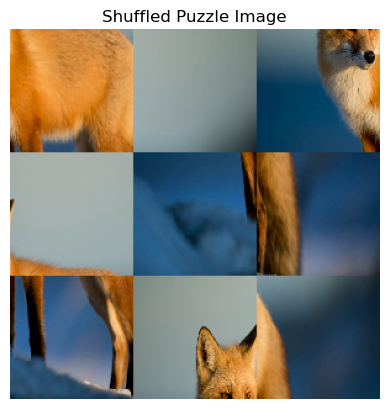

In [7]:
shuffled_img = reconstruct_image(shuffled_tiles, N)
plt.imshow(shuffled_img)
plt.title("Shuffled Puzzle Image")
plt.axis("off")
plt.show()

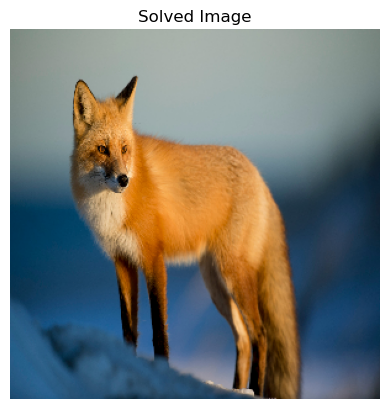

In [8]:
solved_img = reconstruct_image(tiles, N)
plt.imshow(solved_img)
plt.title("Solved Image")
plt.axis("off")
plt.show()